<a href="https://colab.research.google.com/github/wiktor1468/StudentsStudyPerformance/blob/main/StudentsStudyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Students performance in exams

This project shows how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

My goal is to understand the influence of the parent's background, test preparation, Gender, Ethnicity and lunch on students' performance

#Read the csv file
Import libraries

In [ ]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('/content/drive/MyDrive/ML/study_performance.csv')

In [ ]:
pd.set_option('display.max_columns',None)# this makes head() function to show all columns
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Features

In [ ]:
df.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


**Numerical features:** math_score, reading_score, writing_score

**Categorical Features:** gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course



#Checking for missing data, duplicates

In [ ]:
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing data**

In [ ]:
duplicates = df.duplicated().sum()
print("Total Duplicates:", duplicates)

Total Duplicates: 0


# Data categorization

Features which are **Categorical** has to be categorizied.

So: gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course will be set to categories

First I have to check wether there are rarely used values. Next step is to devise a strategy for categorizing them differently. This might involve creating a specialized category ("Others") where these outlier values can be grouped together. Or those values can join other more popullar ones

## Gender

In [ ]:
df['_gender'] = pd.Categorical(df['gender']).codes
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [ ]:
print(dict(enumerate(pd.Categorical(df['gender']).categories)))

{0: 'female', 1: 'male'}


## Race

In [ ]:
df['race_ethnicity'].value_counts() #count the occurrence of a value in a particular column

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

There are no rare values so it can be categorized easily

In [ ]:
df['_race_ethnicity'] = pd.Categorical(df.race_ethnicity).codes #converts its values into categorical codes

In [ ]:
categories_with_codes = dict(enumerate(pd.Categorical(df['race_ethnicity']).categories)) #dictionary where the keys are the numerical codes and the values are the corresponding categories
print(categories_with_codes)

{0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}


## Parental_level_of_education

In [ ]:
df['parental_level_of_education'].value_counts()#count the occurrence of a value in a particular column

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Same situation as above, no rare values

In [ ]:
df['_parental_level_of_education'] = pd.Categorical(df['parental_level_of_education']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['parental_level_of_education']).categories)))

{0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}


## lunch

In [ ]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [ ]:
df['_lunch']= pd.Categorical(df['lunch']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['lunch']).categories)))

{0: 'free/reduced', 1: 'standard'}


## test preparation

In [ ]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
df['_test_preparation_course']= pd.Categorical(df['test_preparation_course']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['test_preparation_course']).categories)))

{0: 'completed', 1: 'none'}


In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1


# Correaltion heatmap

<Axes: >

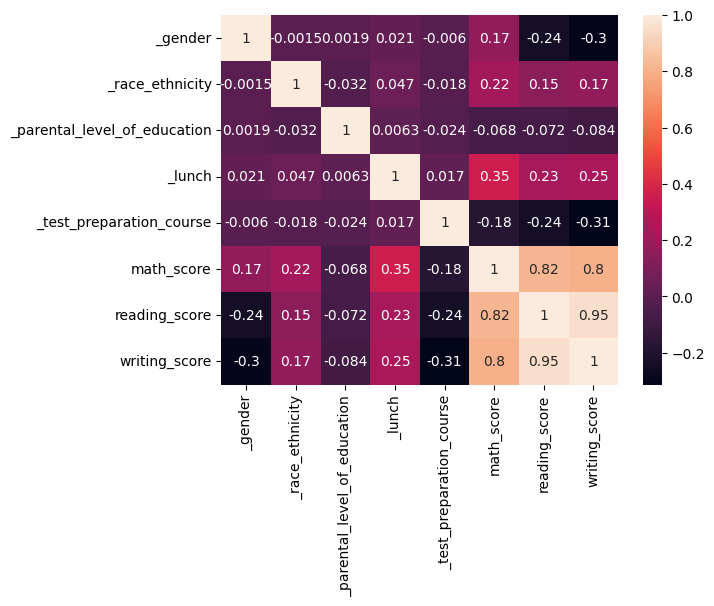

In [ ]:
cols = ['_gender',	'_race_ethnicity',	'_parental_level_of_education',	'_lunch',	'_test_preparation_course', 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

Lunch(0.29) and test_preparation(0.26) might have impact on reuslts in exams

# Standardization(?)

To choose the best scaler to our data I have to look closely at properties in every column. Important thing is to check if there are** outliers values** *(If some outliers are present in the set, robust scalers or other transformers can be more appropriate)*

Visialization of this columns might also be very important to decide what to choose


# Data visualization

## Average score

In [ ]:

df['average_score'] = df[['math_score', 'writing_score', 'reading_score']].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1,72.666667
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0,82.333333
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1,49.333333
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1,76.333333


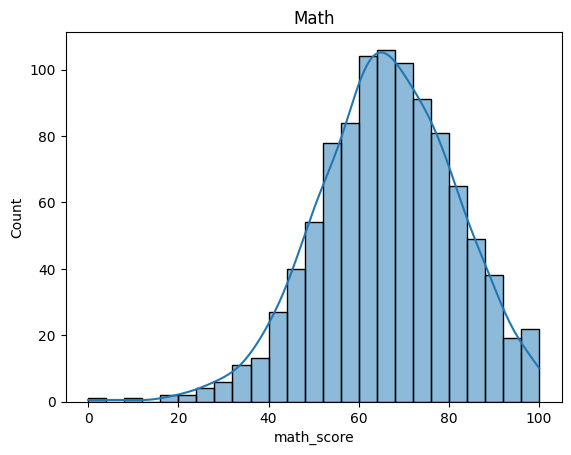

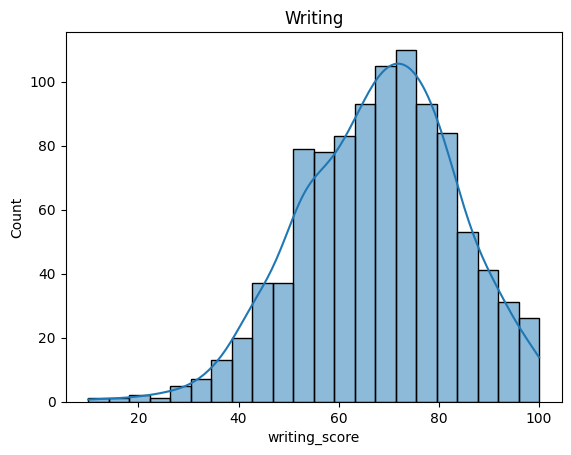

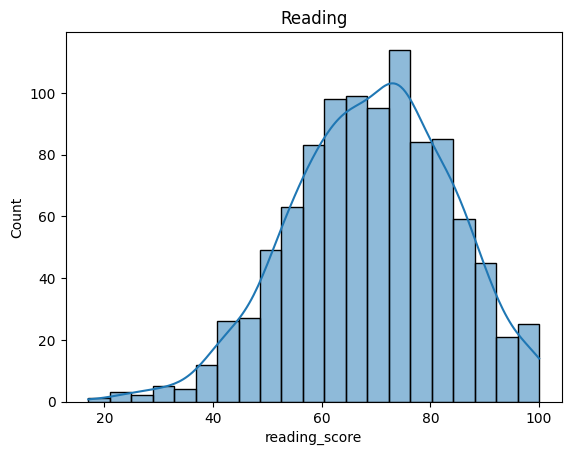

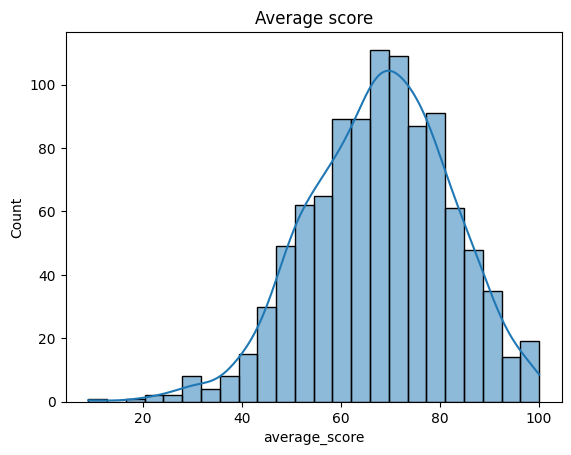

In [ ]:
import matplotlib.pyplot as plt


sns.histplot(df['math_score'], kde=True) #kde- density plot
plt.title('Math')
plt.show()
sns.histplot(df['writing_score'], kde=True) #kde- density plot
plt.title('Writing')
plt.show()
sns.histplot(df['reading_score'], kde=True) #kde- density plot
plt.title('Reading')
plt.show()

sns.histplot(df['average_score'], kde=True) #kde- density plot
plt.title('Average score')
plt.show()

## Relation beetwen scores

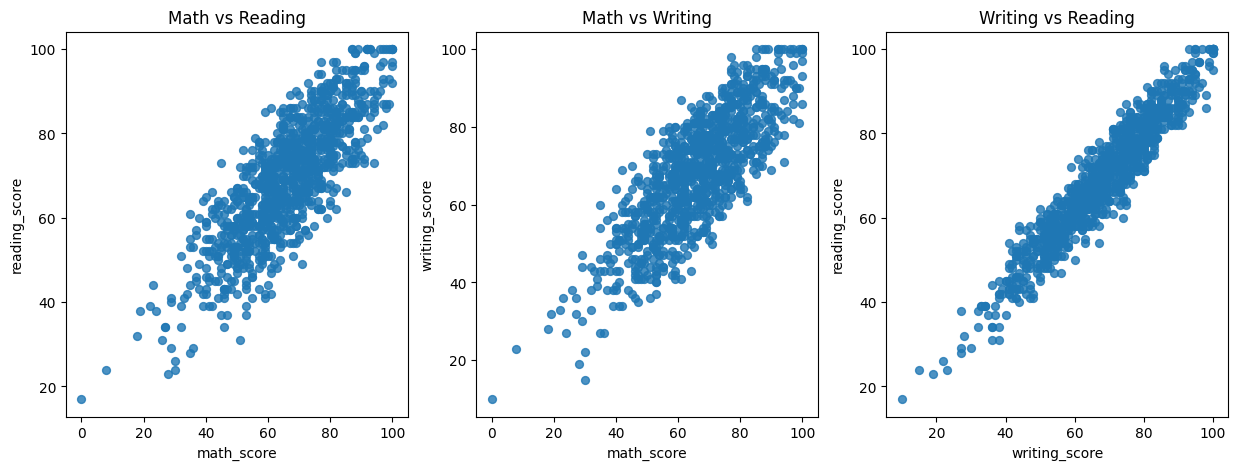

In [ ]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot 1: Math vs Reading
df.plot(kind='scatter', x='math_score', y='reading_score', s=32, alpha=.8, ax=axs[0]) #assigns this plot to the first subplot (index 0)
axs[0].set_title('Math vs Reading')

# Scatter plot 2: Math vs Writing
df.plot(kind='scatter', x='math_score', y='writing_score', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('Math vs Writing')

# Scatter plot 3: Writing vs Reading
df.plot(kind='scatter', x='writing_score', y='reading_score', s=32, alpha=.8, ax=axs[2])
axs[2].set_title('Writing vs Reading')
plt.show()

<Axes: >

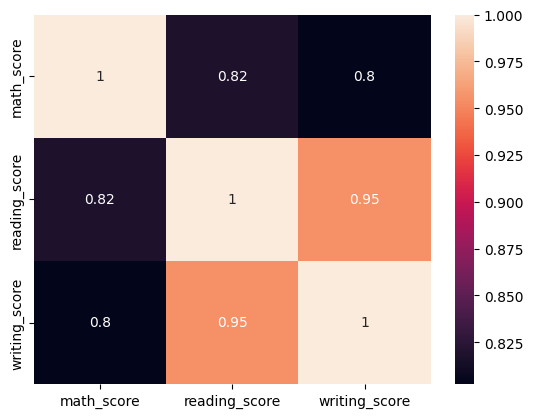

In [ ]:
cols = [ 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

There are high correlaction beetwen results in every subject. The most correlated is reading vs writing (0.95)

## Parental education vs average_score

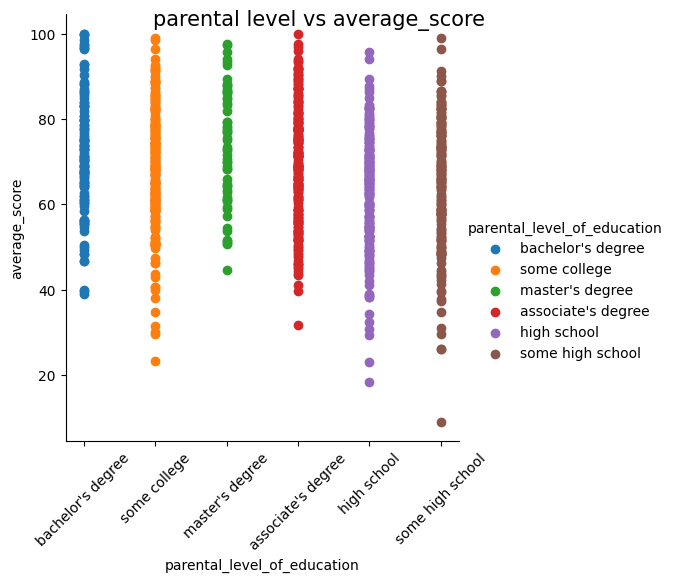

In [ ]:
g = sns.FacetGrid(df, hue="parental_level_of_education", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "parental_level_of_education", "average_score").add_legend()

# Set the title
g.fig.suptitle("parental level vs average_score", fontsize=15)
plt.xticks(rotation=45)
plt.show()

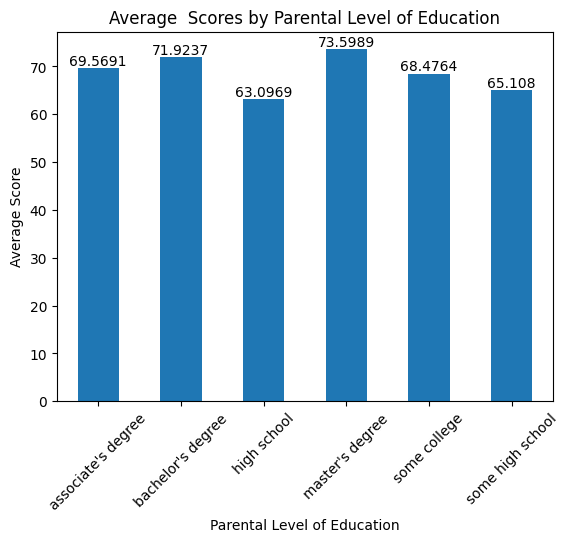

In [ ]:
avgs_score = df.groupby('parental_level_of_education')['average_score'].mean()

bar_plot_avg= avgs_score.plot(kind='bar')
plt.title('Average  Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for i in bar_plot_avg.containers:
    bar_plot_avg.bar_label(i, label_type='edge')


The best performance in exams have childrens whose parents have master's(73,6) or bachelor's(71,9) degree

## Parental education vs math results

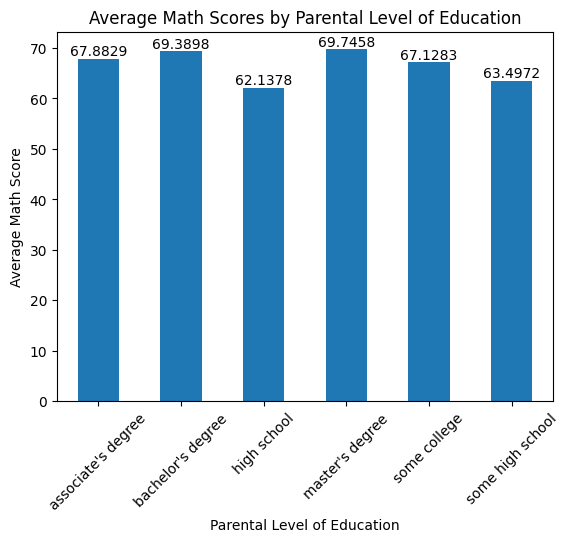

In [ ]:
avg_math_score = df.groupby('parental_level_of_education')['math_score'].mean()

bar_plot= avg_math_score.plot(kind='bar')
plt.title('Average Math Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Math Score')
plt.xticks(rotation=45)
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='edge')


The best performance in math exams have childrens whose parents have master's(69.38) or bachelor's(69,75) degree

## Lunch vs average score

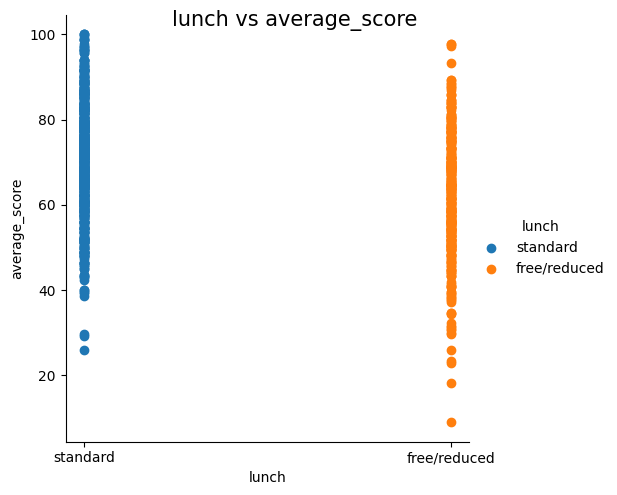

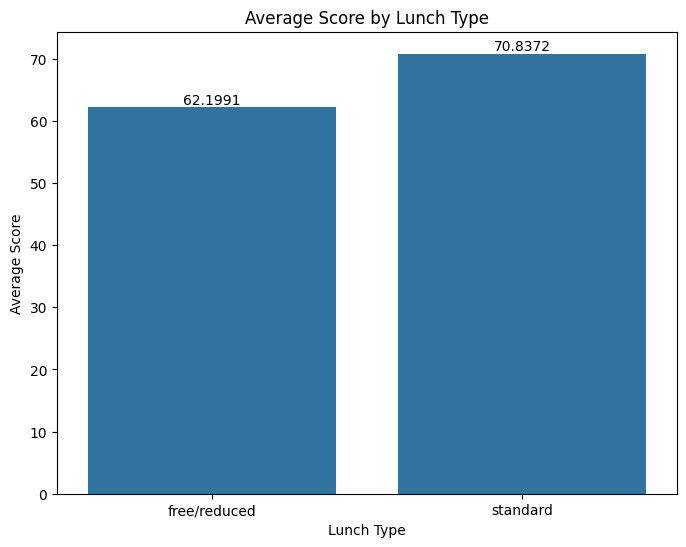

In [ ]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "average_score").add_legend()

g.fig.suptitle("lunch vs average_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['average_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('Average Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()



As plots shows lunch type have impact on exam results. Average score of people with standard lunch type **is higher by 8,6 percent**

### Lunch vs math_score

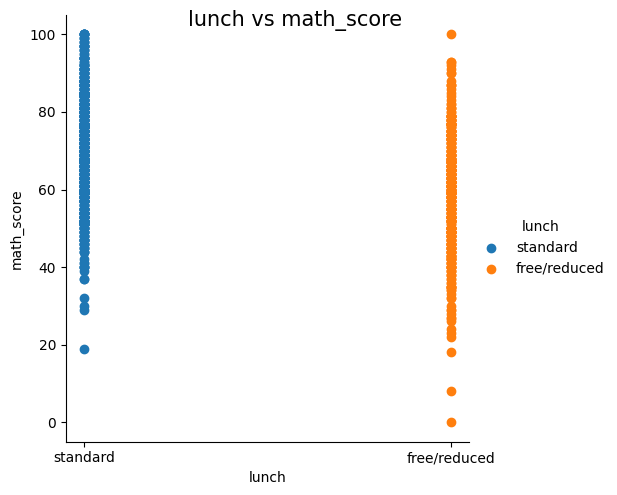

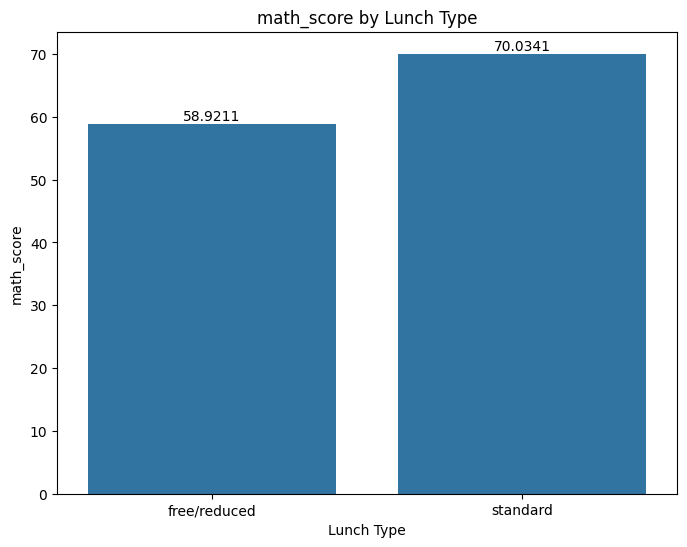

In [ ]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "math_score").add_legend()

g.fig.suptitle("lunch vs math_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['math_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('math_score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('math_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


The lunch type have great impact on performance in math exam. Average math score increases by **10,11** percent

## Test preparation vs exam scores

Firstly, I will visualize writing score due to high correlation score (0.35), and then describe its impact on average score in exams

## Writing score vs test preparation

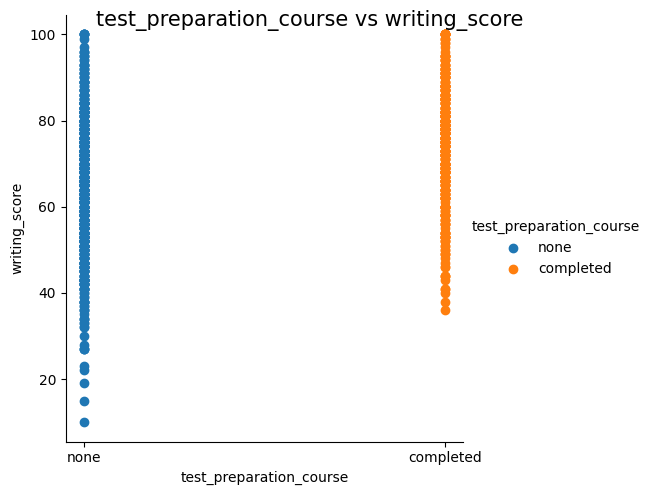

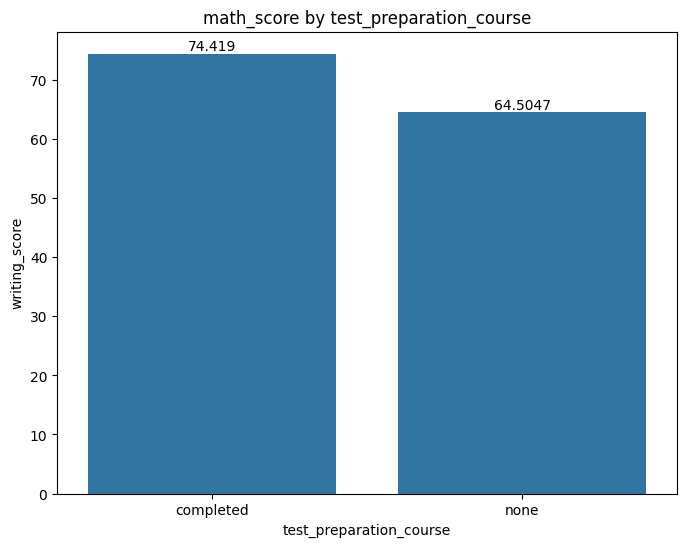

In [ ]:
g = sns.FacetGrid(df, hue="test_preparation_course", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "test_preparation_course", "writing_score").add_legend()

g.fig.suptitle("test_preparation_course vs writing_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('test_preparation_course')['writing_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('math_score by test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('writing_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


Test preparation course have great impact on writing_score. It increase average result by 9.9 percent